In [25]:
library(MASS)


In [26]:
data <- read.csv("InvestmentRatings.csv")
data

gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,⋯,Duration,Invest_Monitor,Expect,Avenue,What.are.your.savings.objectives.,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Female,34,Yes,1,2,5,3,7,6,4,⋯,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
Female,23,Yes,4,3,2,1,5,6,7,⋯,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
Male,30,Yes,3,6,4,2,5,1,7,⋯,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
Male,22,Yes,2,1,3,7,6,4,5,⋯,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
Female,24,No,2,1,3,6,4,5,7,⋯,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet
Female,24,No,7,5,4,6,3,1,2,⋯,1-3 years,Daily,30%-40%,Mutual Fund,Retirement Plan,Liquidity,Fund Diversification,Safe Investment,Risk Free,Internet
Female,27,Yes,3,6,4,2,5,1,7,⋯,3-5 years,Monthly,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,High Interest Rates,Financial Consultants
Male,21,Yes,2,3,7,4,6,1,5,⋯,3-5 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Newspapers and Magazines
Male,35,Yes,2,4,7,5,3,1,6,⋯,1-3 years,Weekly,20%-30%,Equity,Retirement Plan,Capital Appreciation,Fund Diversification,Safe Investment,Fixed Returns,Television


# Data Investigation and Preprocessing

In [27]:
head(data)

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,⋯,Duration,Invest_Monitor,Expect,Avenue,What.are.your.savings.objectives.,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Female,34,Yes,1,2,5,3,7,6,4,⋯,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
2,Female,23,Yes,4,3,2,1,5,6,7,⋯,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
3,Male,30,Yes,3,6,4,2,5,1,7,⋯,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
4,Male,22,Yes,2,1,3,7,6,4,5,⋯,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
5,Female,24,No,2,1,3,6,4,5,7,⋯,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet
6,Female,24,No,7,5,4,6,3,1,2,⋯,1-3 years,Daily,30%-40%,Mutual Fund,Retirement Plan,Liquidity,Fund Diversification,Safe Investment,Risk Free,Internet


The data for preference ranks 1 as the most likely to invest, and 7 as the least likely to invest. I believe this is counterintuitive, since we associate higher numbers with higher preference.

I will swap the numbers, using a score system out of seven, wherein 7 is the highest rating score, and 1 is the lowest.

In [28]:
rank_vars <- c("Mutual_Funds", "Equity_Market", "Debentures",
               "Government_Bonds", "Fixed_Deposits", "PPF", "Gold")

# Reverse the ranks
data[rank_vars] <- 8 - data[rank_vars]


In [29]:
head(data)
attach(data)

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,⋯,Duration,Invest_Monitor,Expect,Avenue,What.are.your.savings.objectives.,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Female,34,Yes,7,6,3,5,1,2,4,⋯,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
2,Female,23,Yes,4,5,6,7,3,2,1,⋯,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
3,Male,30,Yes,5,2,4,6,3,7,1,⋯,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
4,Male,22,Yes,6,7,5,1,2,4,3,⋯,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
5,Female,24,No,6,7,5,2,4,3,1,⋯,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet
6,Female,24,No,1,3,4,2,5,7,6,⋯,1-3 years,Daily,30%-40%,Mutual Fund,Retirement Plan,Liquidity,Fund Diversification,Safe Investment,Risk Free,Internet


I will be investigating the difference in preference for each investment avenue, I will divide my ages into two subsections. First, I will have to find the minimums and maximums.

In [30]:
min(age)
max(age)

[1] 21

[1] 35

In [31]:
# Create a new column called gender_numeric
data$gender_numeric <- ifelse(data$gender == "Male", 1, 2)

# Print the head of the data to show changes
head(data)

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,⋯,Invest_Monitor,Expect,Avenue,What.are.your.savings.objectives.,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source,gender_numeric
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,Female,34,Yes,7,6,3,5,1,2,4,⋯,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines,2
2,Female,23,Yes,4,5,6,7,3,2,1,⋯,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants,2
3,Male,30,Yes,5,2,4,6,3,7,1,⋯,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television,1
4,Male,22,Yes,6,7,5,1,2,4,3,⋯,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet,1
5,Female,24,No,6,7,5,2,4,3,1,⋯,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet,2
6,Female,24,No,1,3,4,2,5,7,6,⋯,Daily,30%-40%,Mutual Fund,Retirement Plan,Liquidity,Fund Diversification,Safe Investment,Risk Free,Internet,2


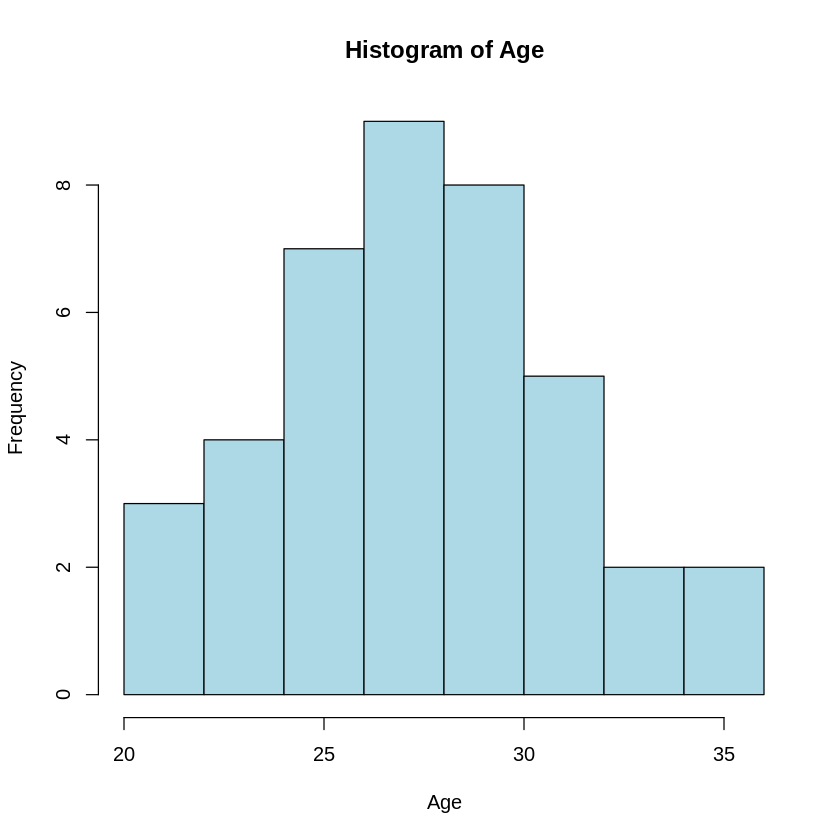

In [32]:
hist(age, main="Histogram of Age", xlab="Age", col="lightblue", border="black")

There seems to be more people aged below 28, but the number isn't too much bigger than above it. This will be our division point for making the two categorical values. 0 will indicate young adults from 21 to 28, and 1 will indicate older adults from 29 to 35.

At this point in life, we may also discern differences between the two age groups. Younger adults are still starting out adulthood, with some still an undergraduate or in higher education, and with others still starting their careers. Older adults, from 28 and above will have had a simple career already built, possibly already paying a loan for a house, have gotten married, or have children.

In [33]:
data$AgeGroupNum <- cut(data$age,
                        breaks = c(20, 28, 35),
                        labels = c("0", "1"),
                        include.lowest = TRUE)

data$AgeGroupNum <- as.factor(data$AgeGroupNum)


In [34]:
head(data)

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,⋯,Expect,Avenue,What.are.your.savings.objectives.,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source,gender_numeric,AgeGroupNum
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>
1,Female,34,Yes,7,6,3,5,1,2,4,⋯,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines,2,1
2,Female,23,Yes,4,5,6,7,3,2,1,⋯,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants,2,0
3,Male,30,Yes,5,2,4,6,3,7,1,⋯,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television,1,1
4,Male,22,Yes,6,7,5,1,2,4,3,⋯,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet,1,0
5,Female,24,No,6,7,5,2,4,3,1,⋯,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet,2,0
6,Female,24,No,1,3,4,2,5,7,6,⋯,30%-40%,Mutual Fund,Retirement Plan,Liquidity,Fund Diversification,Safe Investment,Risk Free,Internet,2,0


Next, we will rid of unnecessary columns so our Scatterplot matrix will be more concise.

In [35]:
data <- subset(data, select = -c(Stock_Marktet:Source, Investment_Avenues))


In [36]:
head(data)

,gender,age,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,gender_numeric,AgeGroupNum
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,Female,34,7,6,3,5,1,2,4,2,1
2,Female,23,4,5,6,7,3,2,1,2,0
3,Male,30,5,2,4,6,3,7,1,1,1
4,Male,22,6,7,5,1,2,4,3,1,0
5,Female,24,6,7,5,2,4,3,1,2,0
6,Female,24,1,3,4,2,5,7,6,2,0


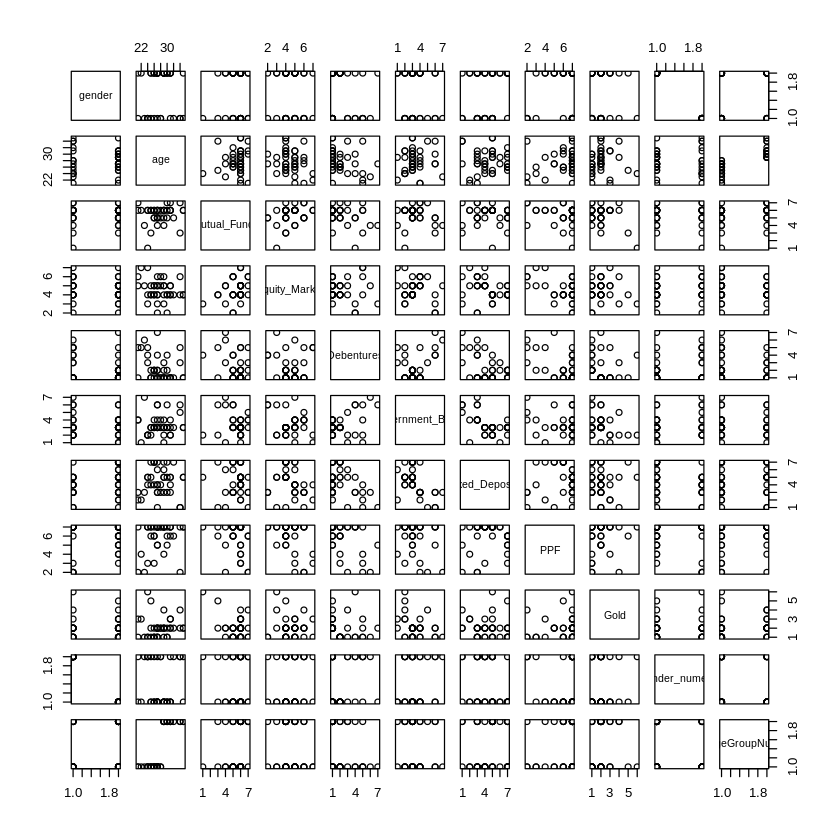

In [37]:
plot(data)

,age,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,gender_numeric
age,1.00000000,0.12391449,-0.24684032,-0.32663845,0.09363152,0.03368549,0.26316684,0.05795221,-0.01468842
Mutual_Funds,0.12391449,1.00000000,0.33204337,-0.35149547,-0.11419794,-0.03160405,-0.19366456,-0.40183039,-0.12012714
Equity_Market,-0.24684032,0.33204337,1.00000000,-0.01689766,-0.23741973,-0.23870544,-0.42900305,-0.05002722,0.09817409
Debentures,-0.32663845,-0.35149547,-0.01689766,1.00000000,0.43032342,-0.47079090,-0.51116896,-0.13719497,0.25749052
Government_Bonds,0.09363152,-0.11419794,-0.23741973,0.43032342,1.00000000,-0.53135936,-0.24035571,-0.30060677,0.18144679
Fixed_Deposits,0.03368549,-0.03160405,-0.23870544,-0.47079090,-0.53135936,1.00000000,0.08363292,-0.09273009,-0.27301624
PPF,0.26316684,-0.19366456,-0.42900305,-0.51116896,-0.24035571,0.08363292,1.00000000,0.12579450,-0.15032083
Gold,0.05795221,-0.40183039,-0.05002722,-0.13719497,-0.30060677,-0.09273009,0.12579450,1.00000000,0.07433427
gender_numeric,-0.01468842,-0.12012714,0.09817409,0.25749052,0.18144679,-0.27301624,-0.15032083,0.07433427,1.00000000


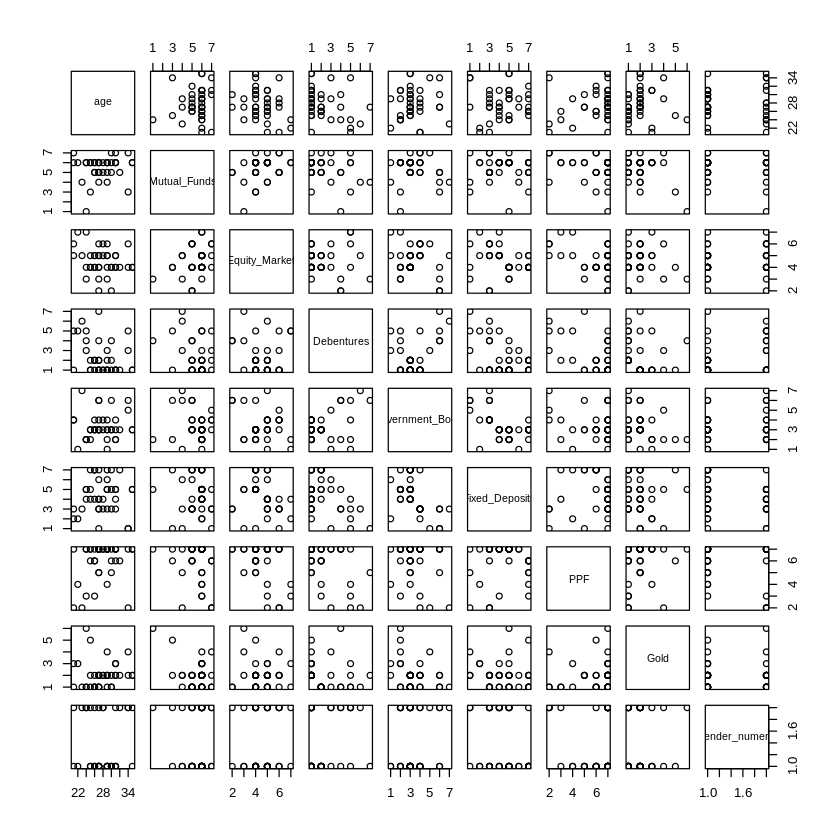

In [38]:
cor(data[, sapply(data, is.numeric)])
pairs(data[, sapply(data, is.numeric)])


Now we will begin modeling with such relationships in mind.

In [39]:
model <- glm(AgeGroupNum ~ Mutual_Funds + Equity_Market +
               Debentures + Government_Bonds + Fixed_Deposits +
               PPF + Gold,
             data = data,
             family = binomial)

summary(model)



Call:
glm(formula = AgeGroupNum ~ Mutual_Funds + Equity_Market + Debentures + 
    Government_Bonds + Fixed_Deposits + PPF + Gold, family = binomial, 
    data = data)

Coefficients: (1 not defined because of singularities)
                 Estimate Std. Error z value Pr(>|z|)  
(Intercept)       11.5084     9.2990   1.238   0.2159  
Mutual_Funds       0.1555     0.3962   0.393   0.6946  
Equity_Market     -1.0767     0.5996  -1.796   0.0725 .
Debentures        -0.7229     0.4554  -1.587   0.1124  
Government_Bonds  -0.3740     0.4801  -0.779   0.4360  
Fixed_Deposits    -0.5028     0.3986  -1.261   0.2071  
PPF               -0.4645     0.4545  -1.022   0.3068  
Gold                   NA         NA      NA       NA  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 54.548  on 39  degrees of freedom
Residual deviance: 47.125  on 33  degrees of freedom
AIC: 61.125

Number of Fisher Scoring i

In [40]:
alias(model)

Model :
AgeGroupNum ~ Mutual_Funds + Equity_Market + Debentures + Government_Bonds + 
    Fixed_Deposits + PPF + Gold

Complete :
     (Intercept) Mutual_Funds Equity_Market Debentures Government_Bonds
Gold 28          -1           -1            -1         -1              
     Fixed_Deposits PPF
Gold -1             -1 


Based on the alias command, it is stated that Gold is dependent on every other investment avenue which is why it was omitted from the initial model.

Think: Gold = Intercept + Mut.Fund(-1) + Equi.Mark(-1) + Debentures(-1) + Gov.Bonds(-1) + FixedDeposits(-1) + PPF(-1).

The answer to this equation will always be what rating given to Gold was, which adds no new information

However, this could be said for whichever variable was put last.

In [41]:
modelalias <- glm(AgeGroupNum ~ Mutual_Funds + Equity_Market +
               Debentures + Government_Bonds + Fixed_Deposits +
               Gold + PPF,
             data = data,
             family = binomial)

summary(modelalias)


Call:
glm(formula = AgeGroupNum ~ Mutual_Funds + Equity_Market + Debentures + 
    Government_Bonds + Fixed_Deposits + Gold + PPF, family = binomial, 
    data = data)

Coefficients: (1 not defined because of singularities)
                 Estimate Std. Error z value Pr(>|z|)
(Intercept)      -1.49650    5.92395  -0.253    0.801
Mutual_Funds      0.62001    0.45543   1.361    0.173
Equity_Market    -0.61226    0.42140  -1.453    0.146
Debentures       -0.25848    0.33562  -0.770    0.441
Government_Bonds  0.09051    0.46134   0.196    0.844
Fixed_Deposits   -0.03833    0.33457  -0.115    0.909
Gold              0.46446    0.45446   1.022    0.307
PPF                    NA         NA      NA       NA

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 54.548  on 39  degrees of freedom
Residual deviance: 47.125  on 33  degrees of freedom
AIC: 61.125

Number of Fisher Scoring iterations: 4


Essentially, each rating point adds up to the same amount of points given to each respondent, which causes perfect multicollinearity. For now, we will remove Gold as a variable, and add it back later to investigate it.

In [42]:
model2 <- glm(AgeGroupNum ~
               Debentures + Fixed_Deposits,
             data = data,
             family = binomial)

summary(model2)


Call:
glm(formula = AgeGroupNum ~ Debentures + Fixed_Deposits, family = binomial, 
    data = data)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)
(Intercept)     0.97876    1.28037   0.764    0.445
Debentures     -0.39695    0.24867  -1.596    0.110
Fixed_Deposits -0.09623    0.20884  -0.461    0.645

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 54.548  on 39  degrees of freedom
Residual deviance: 51.597  on 37  degrees of freedom
AIC: 57.597

Number of Fisher Scoring iterations: 4


Moving on from this base model, we will remove variables that are the least significant. Mutual Funds with its high p value will be removed.

In [43]:
model2 <- glm(AgeGroupNum ~ Equity_Market +
               Debentures + Fixed_Deposits,
             data = data,
             family = binomial)

summary(model2)


Call:
glm(formula = AgeGroupNum ~ Equity_Market + Debentures + Fixed_Deposits, 
    family = binomial, data = data)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)  
(Intercept)      4.2319     2.6727   1.583   0.1133  
Equity_Market   -0.5491     0.3828  -1.434   0.1515  
Debentures      -0.5255     0.2921  -1.799   0.0721 .
Fixed_Deposits  -0.2192     0.2318  -0.946   0.3442  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 54.548  on 39  degrees of freedom
Residual deviance: 49.237  on 36  degrees of freedom
AIC: 57.237

Number of Fisher Scoring iterations: 4


After removing many insignificant values in our model, it is still not great.

In [44]:
predictions <- predict(model2, type = "response")
predicted_classes <- ifelse(predictions > 0.5, 1, 0)
table(data$AgeGroupNum, predicted_classes)

   predicted_classes
     0  1
  0 17  6
  1  8  9

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.95 loaded



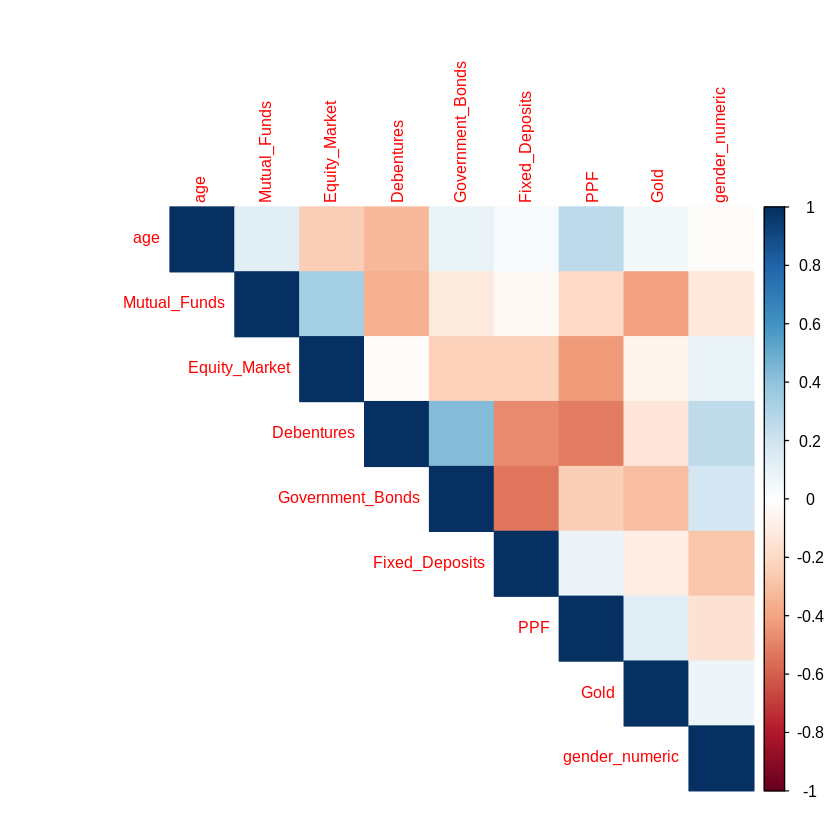

In [45]:
install.packages("corrplot")
library(corrplot)

cor_matrix <- cor(data[, sapply(data, is.numeric)], use = "complete.obs")
corrplot(cor_matrix, method = "color", type = "upper", tl.cex = 0.8)


Looking at this correlation plot, there seems to be a good amount of correlation between fixed deposits and government Bonds since both of these avenues are considered safe investments.

In [46]:
model3 <- glm(AgeGroupNum ~ Mutual_Funds * Equity_Market +
               Debentures + Government_Bonds * Fixed_Deposits,
             data = data,
             family = binomial)

summary(model3)


Call:
glm(formula = AgeGroupNum ~ Mutual_Funds * Equity_Market + Debentures + 
    Government_Bonds * Fixed_Deposits, family = binomial, data = data)

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)   
(Intercept)                     -73.8895    31.7458  -2.328  0.01994 * 
Mutual_Funds                      9.6238     4.5537   2.113  0.03457 * 
Equity_Market                     8.7280     4.9363   1.768  0.07704 . 
Debentures                       -1.3975     0.6498  -2.151  0.03151 * 
Government_Bonds                  7.1917     2.7303   2.634  0.00844 **
Fixed_Deposits                    5.8127     2.1949   2.648  0.00809 **
Mutual_Funds:Equity_Market       -1.7327     0.9362  -1.851  0.06421 . 
Government_Bonds:Fixed_Deposits  -1.6874     0.6013  -2.806  0.00501 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 54.548  on 39  degrees of freedom
Residua

In [47]:
predictions <- predict(model3, type = "response")
predicted_classes <- ifelse(predictions > 0.5, 1, 0)
table(data$AgeGroupNum, predicted_classes)

   predicted_classes
     0  1
  0 20  3
  1  5 12

We can see now that Equity Market is insignificant. We can justify removing it entirely as it only adds noise to the model. In addition, Mutual Funds and Equity Market are practically the same. They both deal with investing in the stock market, however with different approaches.

In [49]:
cor(data[, sapply(data, is.numeric)])

,age,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,gender_numeric
age,1.00000000,0.12391449,-0.24684032,-0.32663845,0.09363152,0.03368549,0.26316684,0.05795221,-0.01468842
Mutual_Funds,0.12391449,1.00000000,0.33204337,-0.35149547,-0.11419794,-0.03160405,-0.19366456,-0.40183039,-0.12012714
Equity_Market,-0.24684032,0.33204337,1.00000000,-0.01689766,-0.23741973,-0.23870544,-0.42900305,-0.05002722,0.09817409
Debentures,-0.32663845,-0.35149547,-0.01689766,1.00000000,0.43032342,-0.47079090,-0.51116896,-0.13719497,0.25749052
Government_Bonds,0.09363152,-0.11419794,-0.23741973,0.43032342,1.00000000,-0.53135936,-0.24035571,-0.30060677,0.18144679
Fixed_Deposits,0.03368549,-0.03160405,-0.23870544,-0.47079090,-0.53135936,1.00000000,0.08363292,-0.09273009,-0.27301624
PPF,0.26316684,-0.19366456,-0.42900305,-0.51116896,-0.24035571,0.08363292,1.00000000,0.12579450,-0.15032083
Gold,0.05795221,-0.40183039,-0.05002722,-0.13719497,-0.30060677,-0.09273009,0.12579450,1.00000000,0.07433427
gender_numeric,-0.01468842,-0.12012714,0.09817409,0.25749052,0.18144679,-0.27301624,-0.15032083,0.07433427,1.00000000


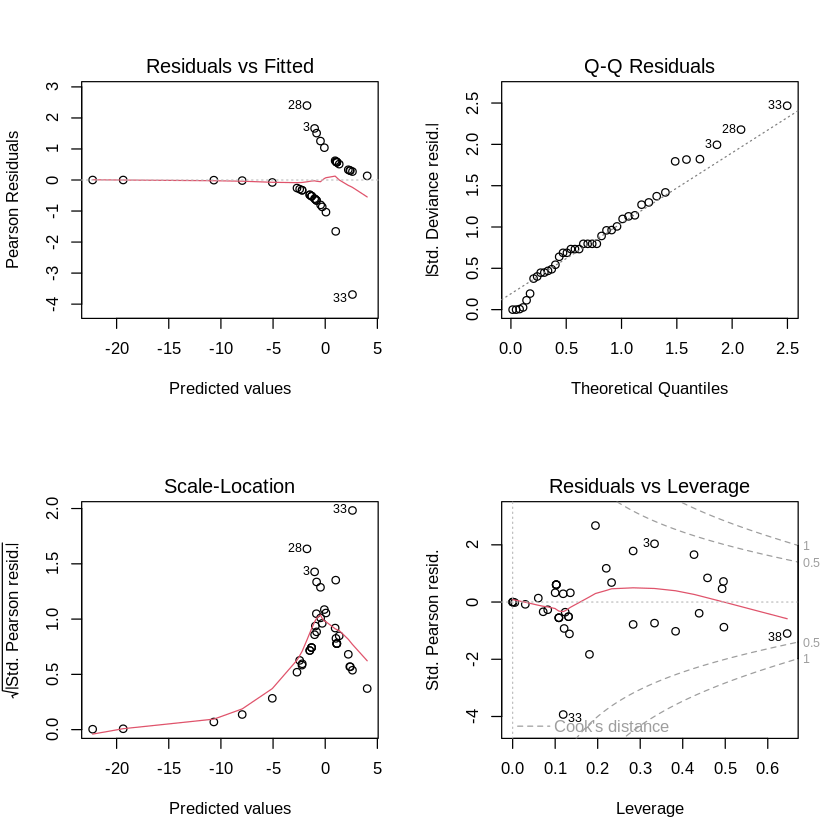

In [50]:
par(mfrow = c(2,2))
plot(model3)

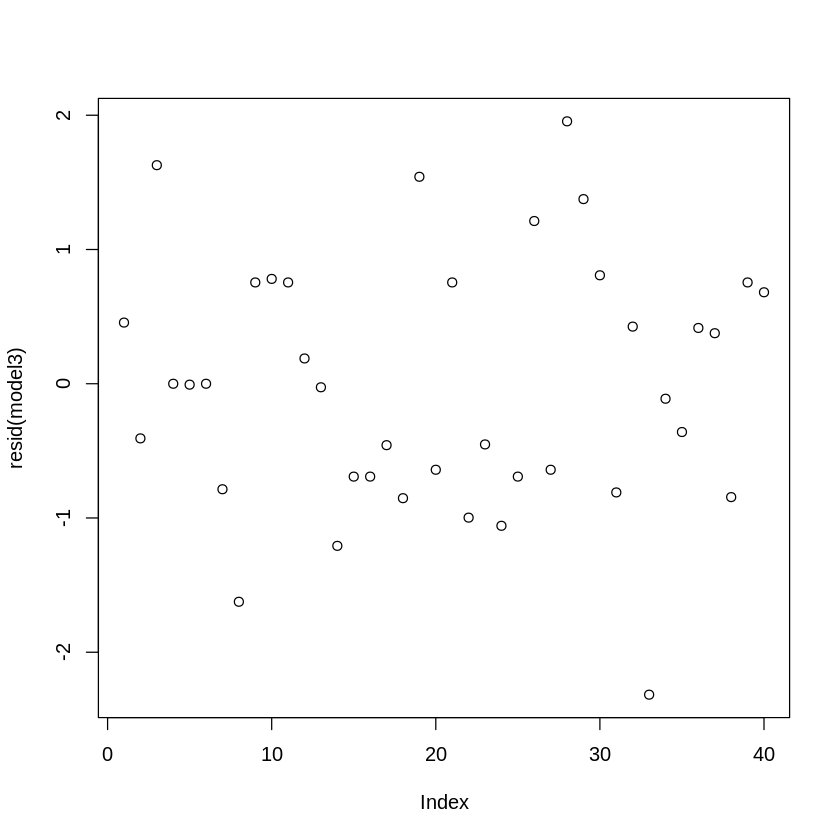

In [51]:
plot(resid(model3))

The model so far doesn't seem to violate any of the assumptions.

Upon further testing, Public Provident Funds and Mutual Funds seem to have a positive effect when interacting. However, these are two different avenues of investments and have no plausible explanation. Instead, we will use model 5, which removes PPF. Later, we will be able to see that this is merely noise.

In [52]:
model4 <- glm(AgeGroupNum ~ Mutual_Funds + PPF + Debentures + Government_Bonds * Fixed_Deposits,
             data = data,
             family = binomial)

summary(model4)


Call:
glm(formula = AgeGroupNum ~ Mutual_Funds + PPF + Debentures + 
    Government_Bonds * Fixed_Deposits, family = binomial, data = data)

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)  
(Intercept)                     -50.9029    22.0748  -2.306   0.0211 *
Mutual_Funds                      2.5565     1.0701   2.389   0.0169 *
PPF                               0.9699     0.7154   1.356   0.1752  
Debentures                       -1.1924     0.6075  -1.963   0.0497 *
Government_Bonds                  7.8966     3.1910   2.475   0.0133 *
Fixed_Deposits                    6.8652     2.7619   2.486   0.0129 *
Government_Bonds:Fixed_Deposits  -1.8155     0.7086  -2.562   0.0104 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 54.548  on 39  degrees of freedom
Residual deviance: 36.676  on 33  degrees of freedom
AIC: 50.676

Number of Fisher Scoring iterat

In [53]:
predictions <- predict(model4, type = "response")
predicted_classes <- ifelse(predictions > 0.5, 1, 0)


In [54]:
table(data$AgeGroupNum, predicted_classes)

   predicted_classes
     0  1
  0 20  3
  1  4 13

The accuracy for model 4 is just about 82%.

Model 5 below has a higher AIC, but every value in it is significant. By removing PPF, we make Debentures statistically significant. Now may also be a good time to check if Gold, the previously removed variable, turns out to be significant.

In [55]:
model5 <- glm(AgeGroupNum ~ Mutual_Funds + Debentures + Government_Bonds * Fixed_Deposits,
             data = data,
             family = binomial)

summary(model5)


Call:
glm(formula = AgeGroupNum ~ Mutual_Funds + Debentures + Government_Bonds * 
    Fixed_Deposits, family = binomial, data = data)

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)   
(Intercept)                     -30.4043    12.4222  -2.448  0.01438 * 
Mutual_Funds                      1.7939     0.8132   2.206  0.02738 * 
Debentures                       -1.1417     0.5363  -2.129  0.03325 * 
Government_Bonds                  5.7463     2.2804   2.520  0.01174 * 
Fixed_Deposits                    4.9100     1.9016   2.582  0.00982 **
Government_Bonds:Fixed_Deposits  -1.3784     0.5236  -2.633  0.00847 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 54.548  on 39  degrees of freedom
Residual deviance: 38.753  on 34  degrees of freedom
AIC: 50.753

Number of Fisher Scoring iterations: 6


In [56]:
modelgold <- glm(AgeGroupNum ~ Mutual_Funds + Debentures + Government_Bonds * Fixed_Deposits + Gold,
             data = data,
             family = binomial)

summary(modelgold)


Call:
glm(formula = AgeGroupNum ~ Mutual_Funds + Debentures + Government_Bonds * 
    Fixed_Deposits + Gold, family = binomial, data = data)

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)  
(Intercept)                     -31.8378    12.8526  -2.477   0.0132 *
Mutual_Funds                      1.7941     0.8127   2.208   0.0273 *
Debentures                       -1.5590     0.8556  -1.822   0.0685 .
Government_Bonds                  6.7375     2.8252   2.385   0.0171 *
Fixed_Deposits                    5.7473     2.3584   2.437   0.0148 *
Gold                             -0.5519     0.7786  -0.709   0.4784  
Government_Bonds:Fixed_Deposits  -1.6573     0.6938  -2.389   0.0169 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 54.548  on 39  degrees of freedom
Residual deviance: 38.226  on 33  degrees of freedom
AIC: 52.226

Number of Fisher Scoring itera

It turns out that is it not significant.

In [57]:
predictions <- predict(model5, type = "response")
predicted_classes <- ifelse(predictions > 0.5, 1, 0)
table(data$AgeGroupNum, predicted_classes)

   predicted_classes
     0  1
  0 19  4
  1  3 14

The model now makes a wrong prediction on one of the young adults, but makes one more correct prediction on the older adults. Both still have an 82% accuracy rate.

# Finally, we will check if there is violation of assumptions or pitfalls.

Scatterplot Matrix

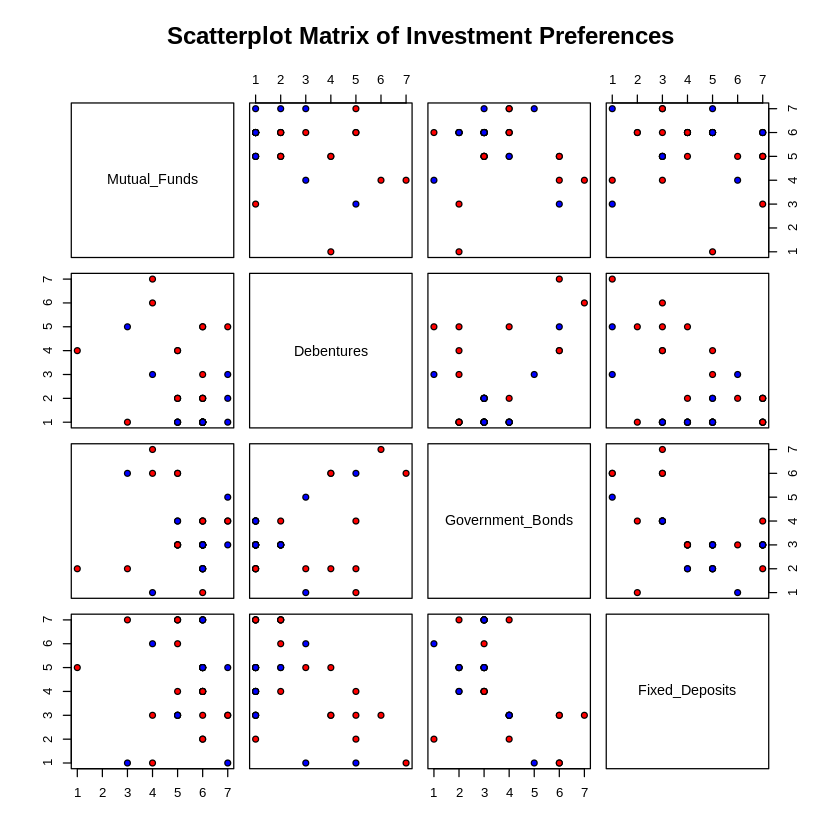

In [58]:
pairs(data[, c("Mutual_Funds", "Debentures", "Government_Bonds", "Fixed_Deposits")],
      main = "Scatterplot Matrix of Investment Preferences",
      pch = 21,
      bg = c("red", "blue")[data$AgeGroupNum])


In [59]:
cor(data[, c("Mutual_Funds", "Debentures", "Government_Bonds", "Fixed_Deposits")])


,Mutual_Funds,Debentures,Government_Bonds,Fixed_Deposits
Mutual_Funds,1.00000000,-0.3514955,-0.1141979,-0.03160405
Debentures,-0.35149547,1.0000000,0.4303234,-0.47079090
Government_Bonds,-0.11419794,0.4303234,1.0000000,-0.53135936
Fixed_Deposits,-0.03160405,-0.4707909,-0.5313594,1.00000000


There isn't any two variables with high correlation, meaning multicollinearity isn't an issue.

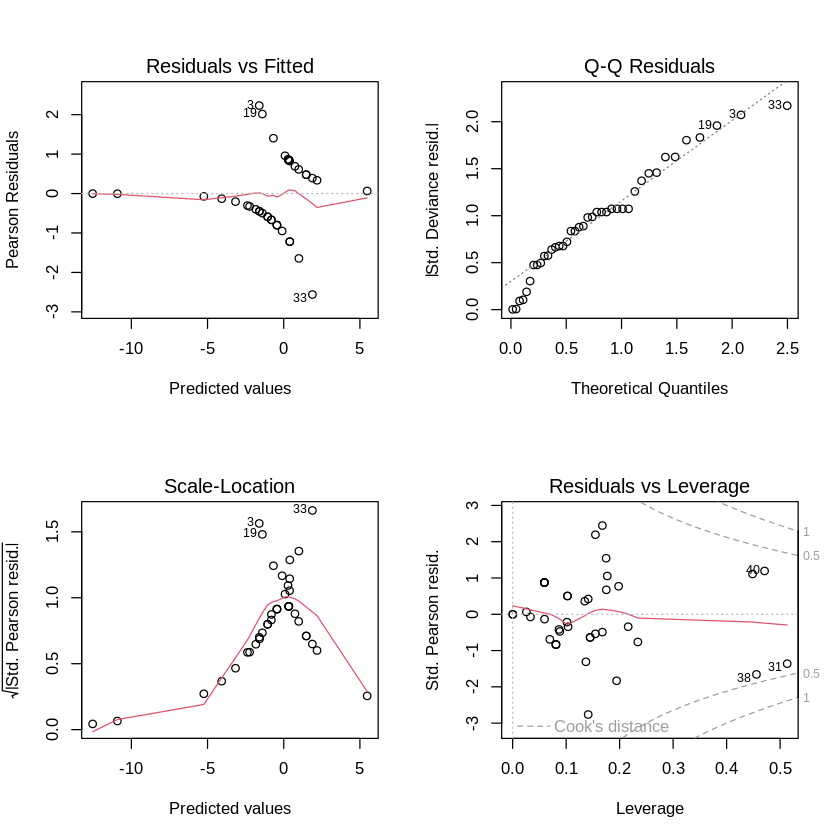

In [60]:
par(mfrow = c(2,2))
plot(model5)

In [61]:
residuals_model <- residuals(model5)
shapiro.test(residuals_model)


	Shapiro-Wilk normality test

data:  residuals_model
W = 0.96243, p-value = 0.2027


In [62]:
install.packages("lmtest")
library(lmtest)
bptest(model5)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




	studentized Breusch-Pagan test

data:  model5
BP = 6.6227, df = 5, p-value = 0.2502


In [63]:
dwtest(model5)


	Durbin-Watson test

data:  model5
DW = 2.0119, p-value = 0.4306
alternative hypothesis: true autocorrelation is greater than 0


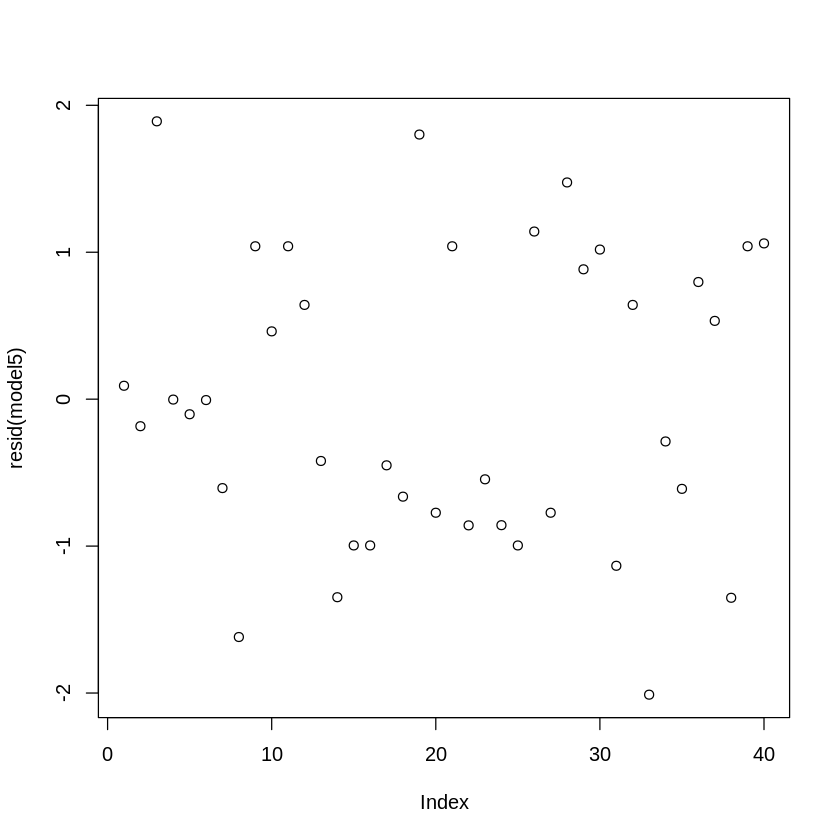

In [65]:
plot(resid(model5))

There doesn't seem to be any violation of assumptions. The residuals fall along the line, showcasing normality. The scatter of residuals also doesn't show a fan shape, meaning there is no autocorrelation. The only thing noticeable are some possible outliers.

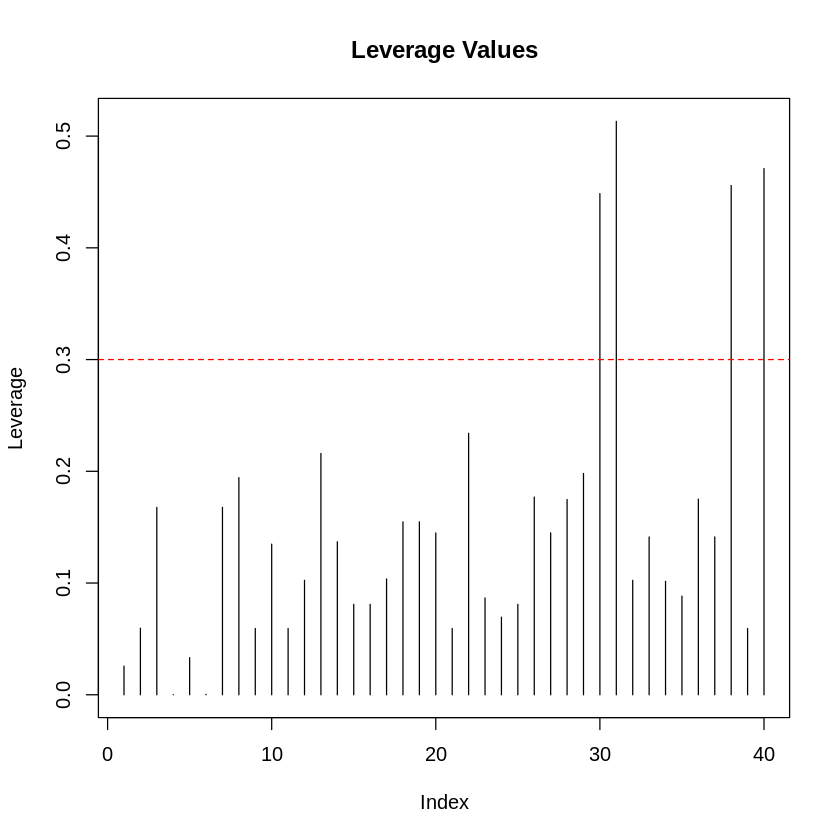

In [66]:
leverage_vals <- hatvalues(model5)
plot(leverage_vals, type = "h", main = "Leverage Values", ylab = "Leverage")
abline(h = 2 * mean(leverage_vals), col = "red", lty = 2)

In [67]:
which(leverage_vals > 2 * mean(leverage_vals))

30 31 38 40 
30 31 38 40

These points seem to be outliers, so we will remove them and test the model again.

In [68]:
newdata <- data[-c(30, 31, 38, 40), ]

In [69]:
model5 <- glm(AgeGroupNum ~ Mutual_Funds + Debentures + Government_Bonds * Fixed_Deposits,
             data = newdata,
             family = binomial)

summary(model5)


Call:
glm(formula = AgeGroupNum ~ Mutual_Funds + Debentures + Government_Bonds * 
    Fixed_Deposits, family = binomial, data = newdata)

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)  
(Intercept)                     -33.6168    15.0476  -2.234   0.0255 *
Mutual_Funds                      1.5841     0.9113   1.738   0.0822 .
Debentures                       -1.2702     0.6453  -1.968   0.0490 *
Government_Bonds                  7.0130     3.5771   1.961   0.0499 *
Fixed_Deposits                    6.0070     3.1000   1.938   0.0527 .
Government_Bonds:Fixed_Deposits  -1.6933     0.9325  -1.816   0.0694 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 48.902  on 35  degrees of freedom
Residual deviance: 33.097  on 30  degrees of freedom
AIC: 45.097

Number of Fisher Scoring iterations: 6


In [70]:
predictions <- predict(model5, type = "response")
predicted_classes <- ifelse(predictions > 0.5, 1, 0)
table(newdata$AgeGroupNum, predicted_classes)

   predicted_classes
     0  1
  0 18  3
  1  3 12

In [73]:
model5 <- glm(AgeGroupNum ~ Mutual_Funds * PPF + Debentures + Government_Bonds * Fixed_Deposits,
             data = newdata,
             family = binomial)

summary(model5)


Call:
glm(formula = AgeGroupNum ~ Mutual_Funds * PPF + Debentures + 
    Government_Bonds * Fixed_Deposits, family = binomial, data = newdata)

Coefficients:
                                 Estimate Std. Error z value Pr(>|z|)  
(Intercept)                     -124.2744    75.2054  -1.652   0.0984 .
Mutual_Funds                      13.6926     9.7512   1.404   0.1603  
PPF                               11.8091     9.3378   1.265   0.2060  
Debentures                        -1.7762     0.8863  -2.004   0.0451 *
Government_Bonds                   9.4308     4.8991   1.925   0.0542 .
Fixed_Deposits                     8.4684     4.4726   1.893   0.0583 .
Mutual_Funds:PPF                  -1.7929     1.4523  -1.234   0.2170  
Government_Bonds:Fixed_Deposits   -2.2158     1.2875  -1.721   0.0853 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 48.902  on 35  degrees of freedom
Residual devia

Upon doing an interaction between Mutual Funds and PPF (Remember that this lowered the AIC before), we can see that after removing outliers, the AIC of this new model has an increased AIC. This means that the previous interaction increasing AIC was merely due to noise that outliers brought.

# Testing our Model

In [75]:
model6 <- glm(AgeGroupNum ~ Mutual_Funds + Debentures + Government_Bonds * Fixed_Deposits,
             data = newdata,
             family = binomial)

summary(model6)


Call:
glm(formula = AgeGroupNum ~ Mutual_Funds + Debentures + Government_Bonds * 
    Fixed_Deposits, family = binomial, data = newdata)

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)  
(Intercept)                     -33.6168    15.0476  -2.234   0.0255 *
Mutual_Funds                      1.5841     0.9113   1.738   0.0822 .
Debentures                       -1.2702     0.6453  -1.968   0.0490 *
Government_Bonds                  7.0130     3.5771   1.961   0.0499 *
Fixed_Deposits                    6.0070     3.1000   1.938   0.0527 .
Government_Bonds:Fixed_Deposits  -1.6933     0.9325  -1.816   0.0694 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 48.902  on 35  degrees of freedom
Residual deviance: 33.097  on 30  degrees of freedom
AIC: 45.097

Number of Fisher Scoring iterations: 6


In [76]:
newdata2 <- data.frame(Mutual_Funds = 4, Debentures = 5, Government_Bonds = 1, Fixed_Deposits = 7)
testprediction = predict(model5, newdata = newdata2, type = "response")
predicted_class <- ifelse(testprediction > 0.5, 1, 0)
predicted_class

1 
1

In [77]:
newdata2 <- data.frame(Mutual_Funds = 3, Debentures = 2, Government_Bonds = 7, Fixed_Deposits = 1)
testprediction = predict(model5, newdata = newdata2, type = "response")
predicted_class <- ifelse(testprediction > 0.5, 1, 0)
predicted_class


1 
1

As we expected, if Government Bonds or Fixed Deposits are high, the model will predict that the respondent is old.

In [78]:
newdata2 <- data.frame(Mutual_Funds = 3, Debentures = 2, Government_Bonds = 7, Fixed_Deposits = 7)
testprediction = predict(model5, newdata = newdata2, type = "response")
predicted_class <- ifelse(testprediction > 0.5, 1, 0)
predicted_class

1 
0

However, it seems that few old respondents rated both highly, possibly having a preference for one.

In essence, younger folks prefer the riskier investment avenues like Mutual Funds (Equity Market included) and Debentures for higher returns and growth, while older folks prefer less-risk options like Government Bonds and Fixed Deposits.

Mutual Funds encompass the data for equity markets since they are similar in concept.

The interaction for Fixed Deposits and Government Bonds can be infered with articles. Fixed Deposits and Government Bonds are considered as conservative investments as they are safe and backed by a bank or government. However, Fixed Deposits are much more popular with the common populace.
https://www.marketbrew.in/weekly-insights/fixed-deposits-fd-hacks-ways-to-get-more
In addition, Fixed Deposits are more reliable than Government Bonds as FD's are less risky and grant the investor more control of their money due to not being tied to a pre-established duration.
https://www.dezerv.in/bonds/bonds-vs-fixed-deposits/

https://www.envestnet.com/financial-intel/research-shows-age-and-affluence-affect-investor-behavior -> Shows difference in priorities for money between generations.

https://www.researchgate.net/profile/Prakash-Chokkamreddy/publication/383975577_An_Empirical_Analysis_of_Investor_Behavior_and_Influencing_Factors_in_Investment_Preferences_A_Study_in_Hyderabad_City/links/66e2ad38fa5e11512cb50230/An-Empirical-Analysis-of-Investor-Behavior-and-Influencing-Factors-in-Investment-Preferences-A-Study-in-Hyderabad-City.pdf -> ANOVA tables that prove difference in investor behavior

https://d1wqtxts1xzle7.cloudfront.net/54717641/Impact_of_Demographics_and_Perceptions_of_Investors-libre.pdf?1508003320=&response-content-disposition=inline%3B+filename%3DImpact_of_Demographics_and_Perceptions_o.pdf&Expires=1745327368&Signature=SkGQqwRw55udxJDo4ej-8mtJ4BAqLWbYhkbeVmcpBknjDGWjEOw8RTLXPiXORhPd1ztAupwA3n~5Jbq3G0NB1msQHR7miRmPmN01~655MY50KA81UOIkMltqLWahw~yNwXK10v4v911V3-hV4ziT0bP0NZ1oZ~KYVfG~bMNCtpGn04XOc5cHk9BsG1417c~s5s-9xhzDxGleScGyt~iwKdzPum2ZjL1Sl5Xotw1XJ5eEq5MMgOA9KbIuBSzQ-V267YvD0YovHJUv5v2zDzxEXjwL~YTHjViv~vCq48pebWFXAXozXSgBPbTajqG6NKkS~2UtOsFm2lr7XGdgD~c8kw__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA -> Same as above